/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

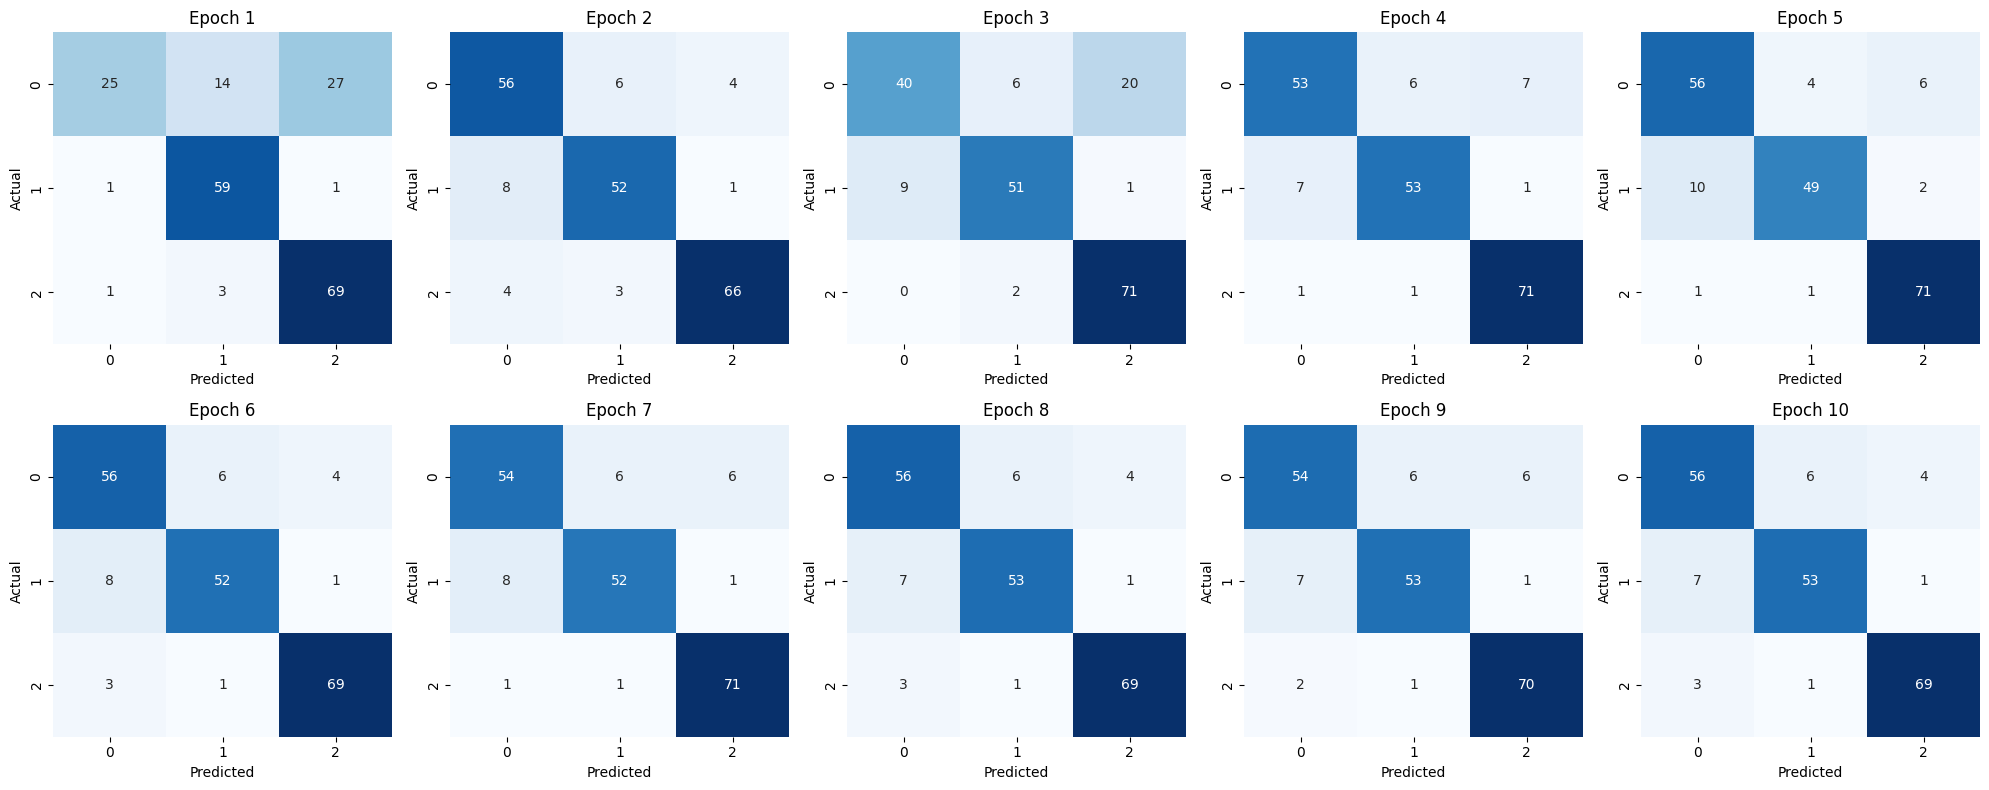

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1, warm_start=True)

# Store confusion matrices
confusion_matrices = []

# Train model over 10 epochs
for epoch in range(10):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Plot confusion matrices using seaborn heatmaps
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap='Blues', ax=ax, cbar=False)  # Use seaborn heatmap
    ax.set_title(f'Epoch {i+1}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

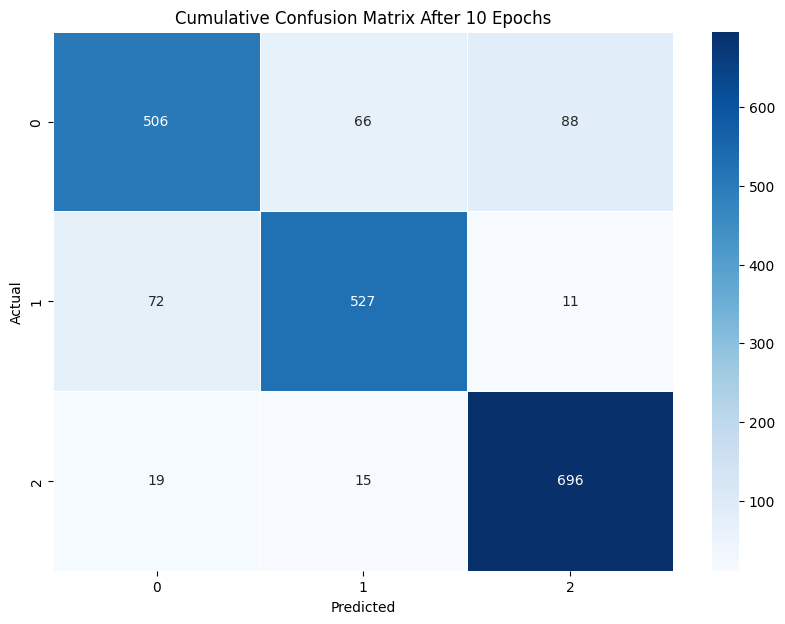

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1, warm_start=True)

# Initialize a single matrix to accumulate confusion matrices
cumulative_confusion_matrix = np.zeros((3, 3))  # Adjust the size according to the number of classes

# Train model over 10 epochs
for epoch in range(10):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cumulative_confusion_matrix += cm  # Update the cumulative matrix

# Plot the cumulative confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cumulative_confusion_matrix, annot=True, fmt="g", cmap='Blues', linewidths=.5)
plt.title('Cumulative Confusion Matrix After 10 Epochs')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score

def calculate_weighted_accuracy(y_true, y_pred, class_weights):
    # Erstellt eine Maske, die angibt, wo Vorhersagen korrekt waren
    correct_predictions = y_true == y_pred
    
    # Wendet die Gewichte auf die korrekten Vorhersagen an
    weighted_correct_predictions = class_weights[y_true] * correct_predictions
    
    # Summiert die gewichteten korrekten Vorhersagen und teilt durch die Summe der Gewichte
    weighted_accuracy = weighted_correct_predictions.sum() / class_weights[y_true].sum()
    return weighted_accuracy

# Beispieldaten
y_true = np.array([0, 1, 2, 2, 0])
y_pred = np.array([0, 2, 2, 2, 0])

# Klassengewichte, angenommen Klassen 0, 1, 2 haben unterschiedliche Größen
class_weights = np.array([0.5, 1.5, 1.0])

weighted_acc = calculate_weighted_accuracy(y_true, y_pred, class_weights)
print("Gewichtete Genauigkeit: {:.2f}".format(weighted_acc))


Gewichtete Genauigkeit: 0.67


In [8]:
from sklearn.metrics import classification_report, f1_score


f1 = f1_score(y_true, y_pred, average=None)
print("F1-Score für jede Klasse: ", f1)

weighted_f1 = f1_score(y_true, y_pred, average='weighted')
print("Gewichteter F1-Score: {:.2f}".format(weighted_f1))


F1-Score für jede Klasse:  [1.  0.  0.8]
Gewichteter F1-Score: 0.72


In [1]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#class_names = dataset.classes
class_names = ['A','B', 'C']

y_true = torch.tensor([1,1,0,0,1,1,0,1])
y_pred = torch.tensor([0,1,2,0,2,1,0,1])

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred, target=y_true)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

NameError: name 'torch' is not defined